In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [23]:
Prudential_train = pd.read_csv("Prudential_train.csv")

In [24]:
Prudential_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [25]:
CATEGORICAL_COLUMNS = ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]
CONTINUOUS_COLUMNS = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]
DISCRETE_COLUMNS = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]
DUMMY_COLUMNS = ["Medical_Keyword_{}".format(i) for i in range(1, 48)]

In [26]:
categorical_data = Prudential_train[CATEGORICAL_COLUMNS]

In [27]:
continuous_data = Prudential_train[CONTINUOUS_COLUMNS]

In [28]:
discrete_data = Prudential_train[DISCRETE_COLUMNS]

In [29]:
dummy_data = Prudential_train[DUMMY_COLUMNS]

# Understand The Variable Types

In [30]:
columns_df=pd.DataFrame({'column_names':Prudential_train.columns,'datatypes':Prudential_train.dtypes},index=None)
x=columns_df.groupby(by=['datatypes']).count()
x.reset_index(inplace=True)
x.rename(columns={"column_names":"Number_of_columns"},inplace=True)
lst=[]
for data_type in x.datatypes:
    v=list(Prudential_train.select_dtypes(include=data_type).columns)
    lst.append(v)
    x['Column_Names']=pd.Series(lst)
x

,datatypes,Number_of_columns,Column_Names
0,int64,109,"[Id, Product_Info_1, Product_Info_3, Product_I..."
1,float64,18,"[Product_Info_4, Ins_Age, Ht, Wt, BMI, Employm..."
2,object,1,[Product_Info_2]


In [31]:
Prudential_train.dtypes    

Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 128, dtype: object

# Finding the NULL values

In [32]:
Prudential_NULL = Prudential_train.isnull().any()
Prudential_NULL =[col for col in Prudential_train.columns if Prudential_train[col].isnull().any()]
Prudential_NULL

['Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Insurance_History_5',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_10',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32']

1) Majority of columns dont have missing values.
2) Target variable does not have any missing values.
3) Few columns have few missing values, whereas few columns have too much missing values.

# Plotting

Categorical

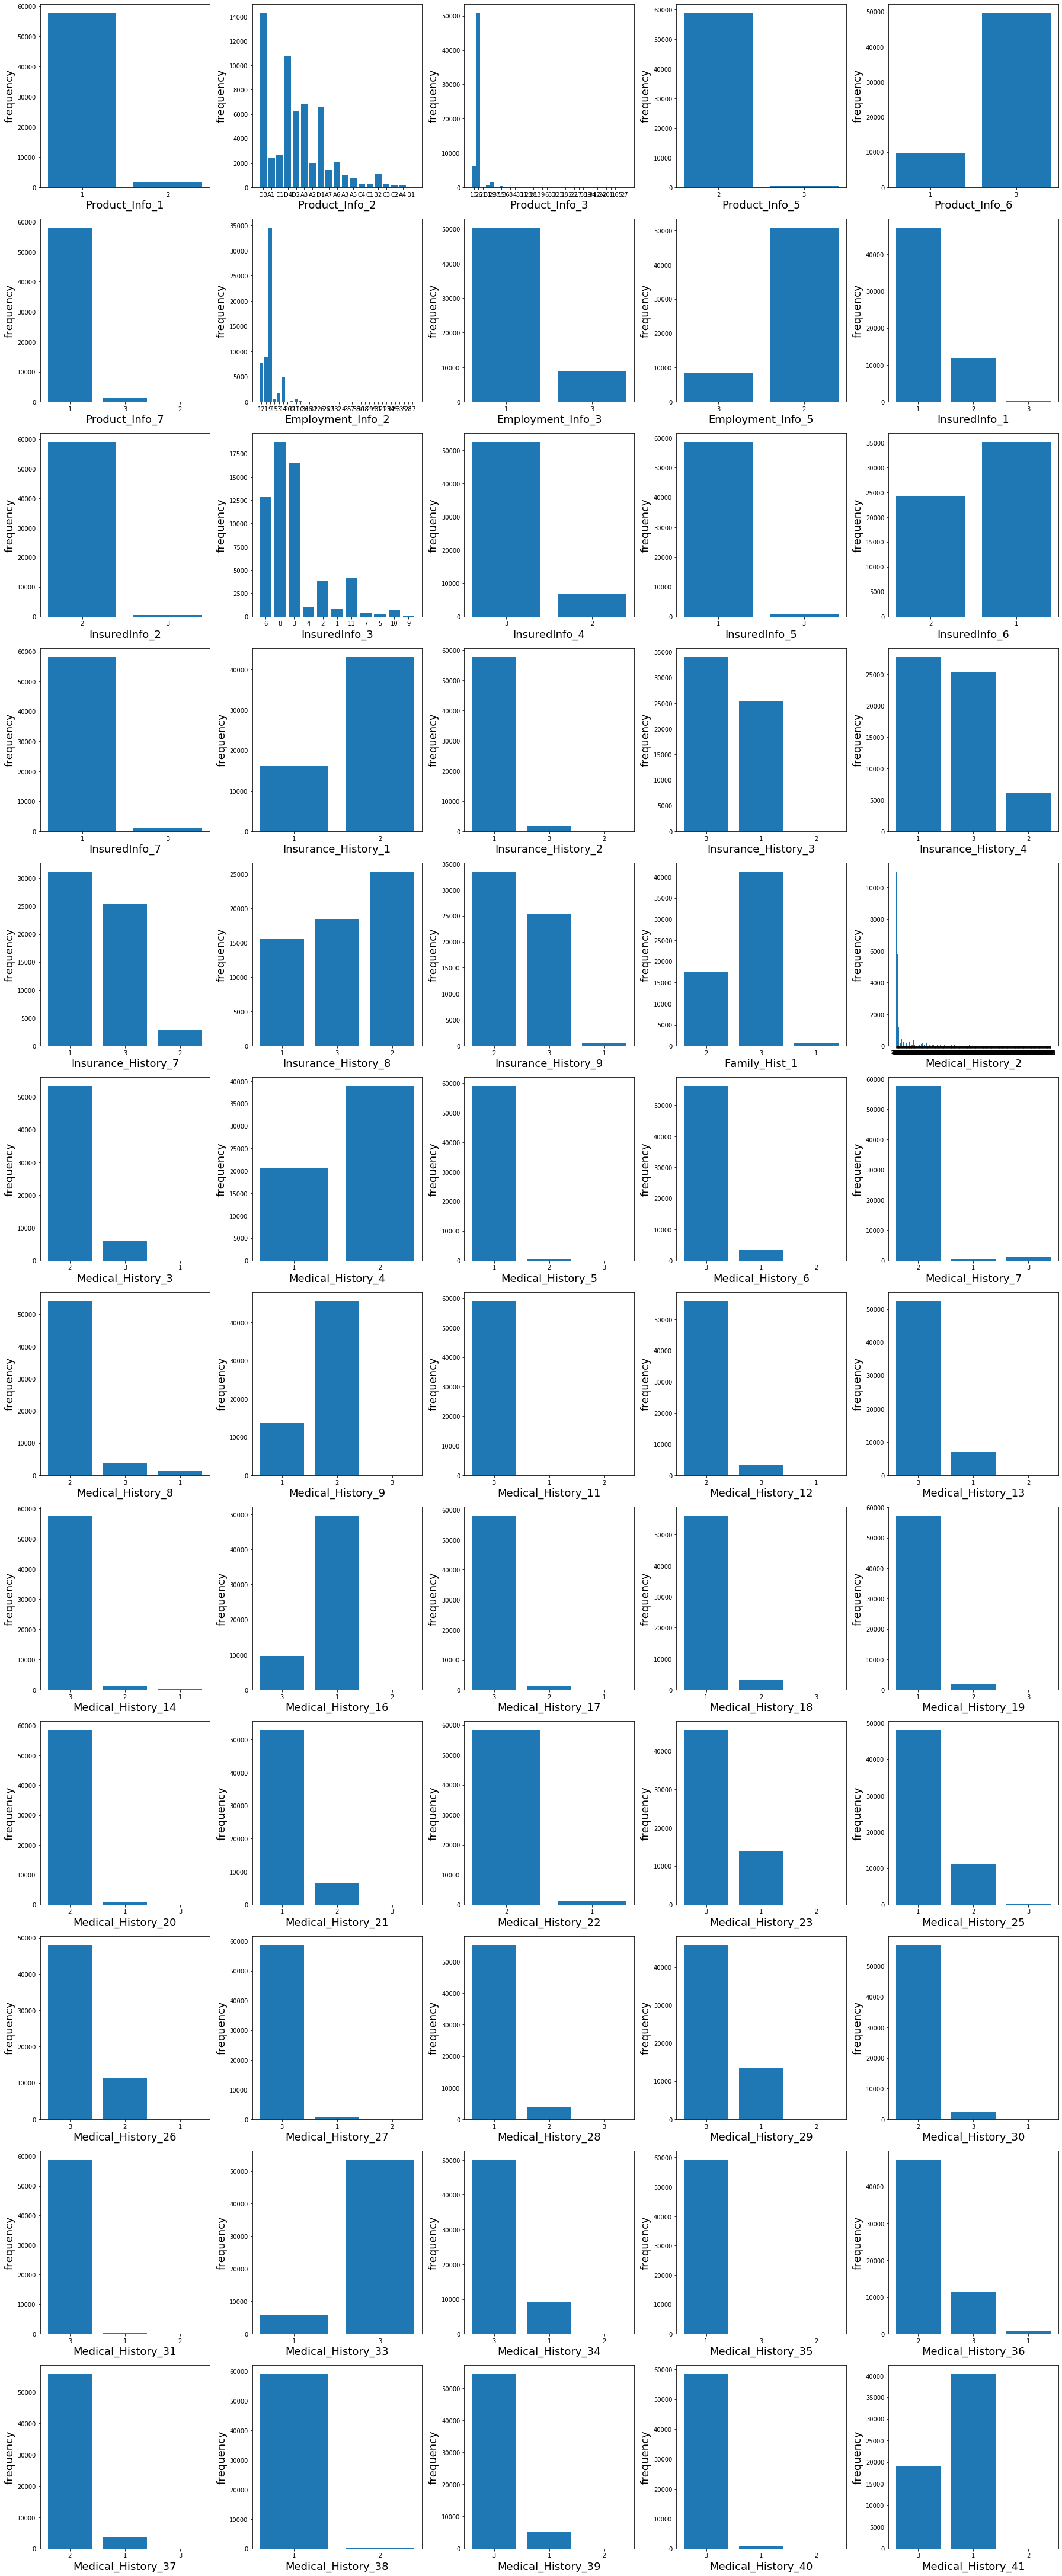

In [33]:

def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(categorical_data)

Continuous variables

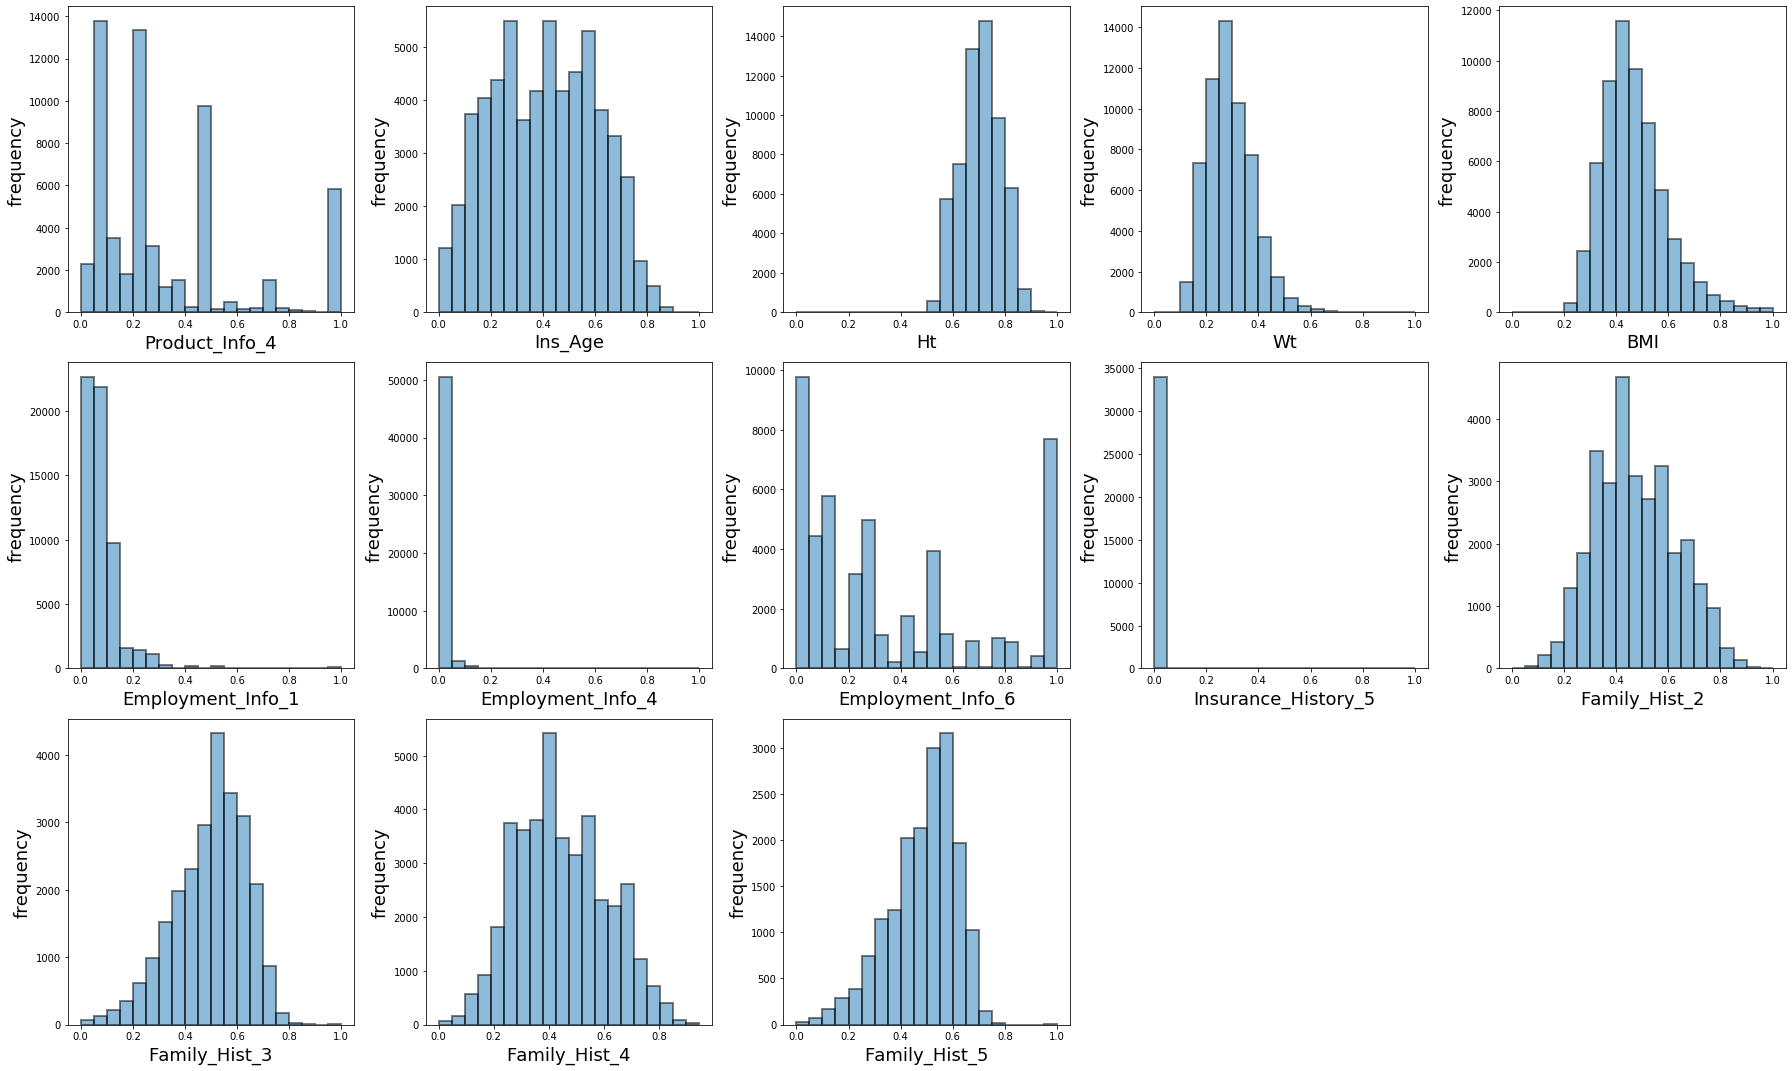

In [34]:
def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()
plot_histgrams(continuous_data)

Discrete Variables

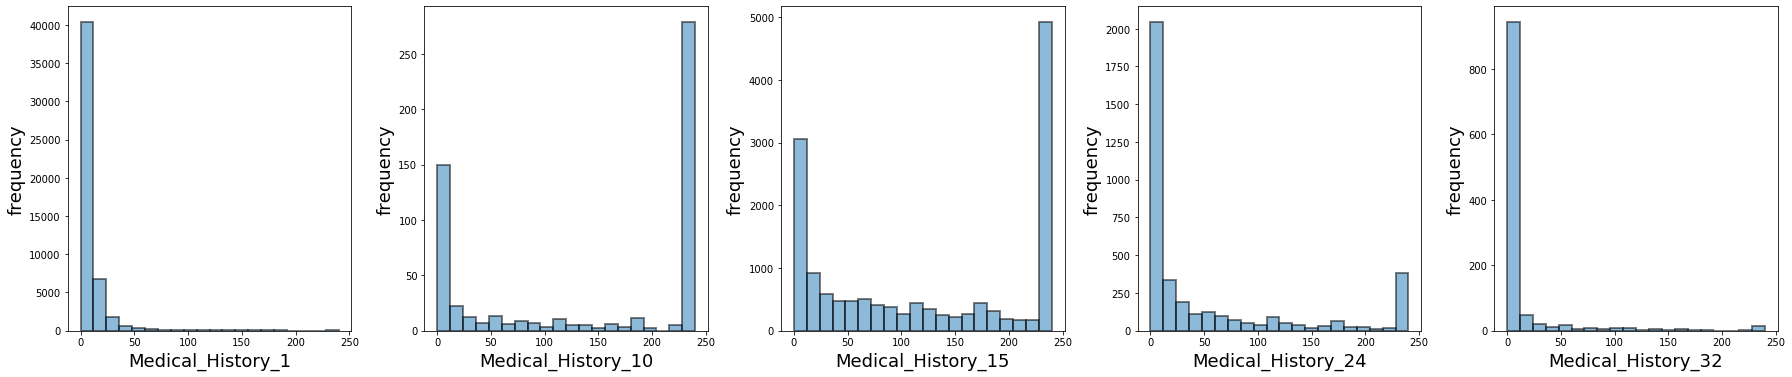

In [35]:
plot_histgrams(discrete_data)

Dummy_data

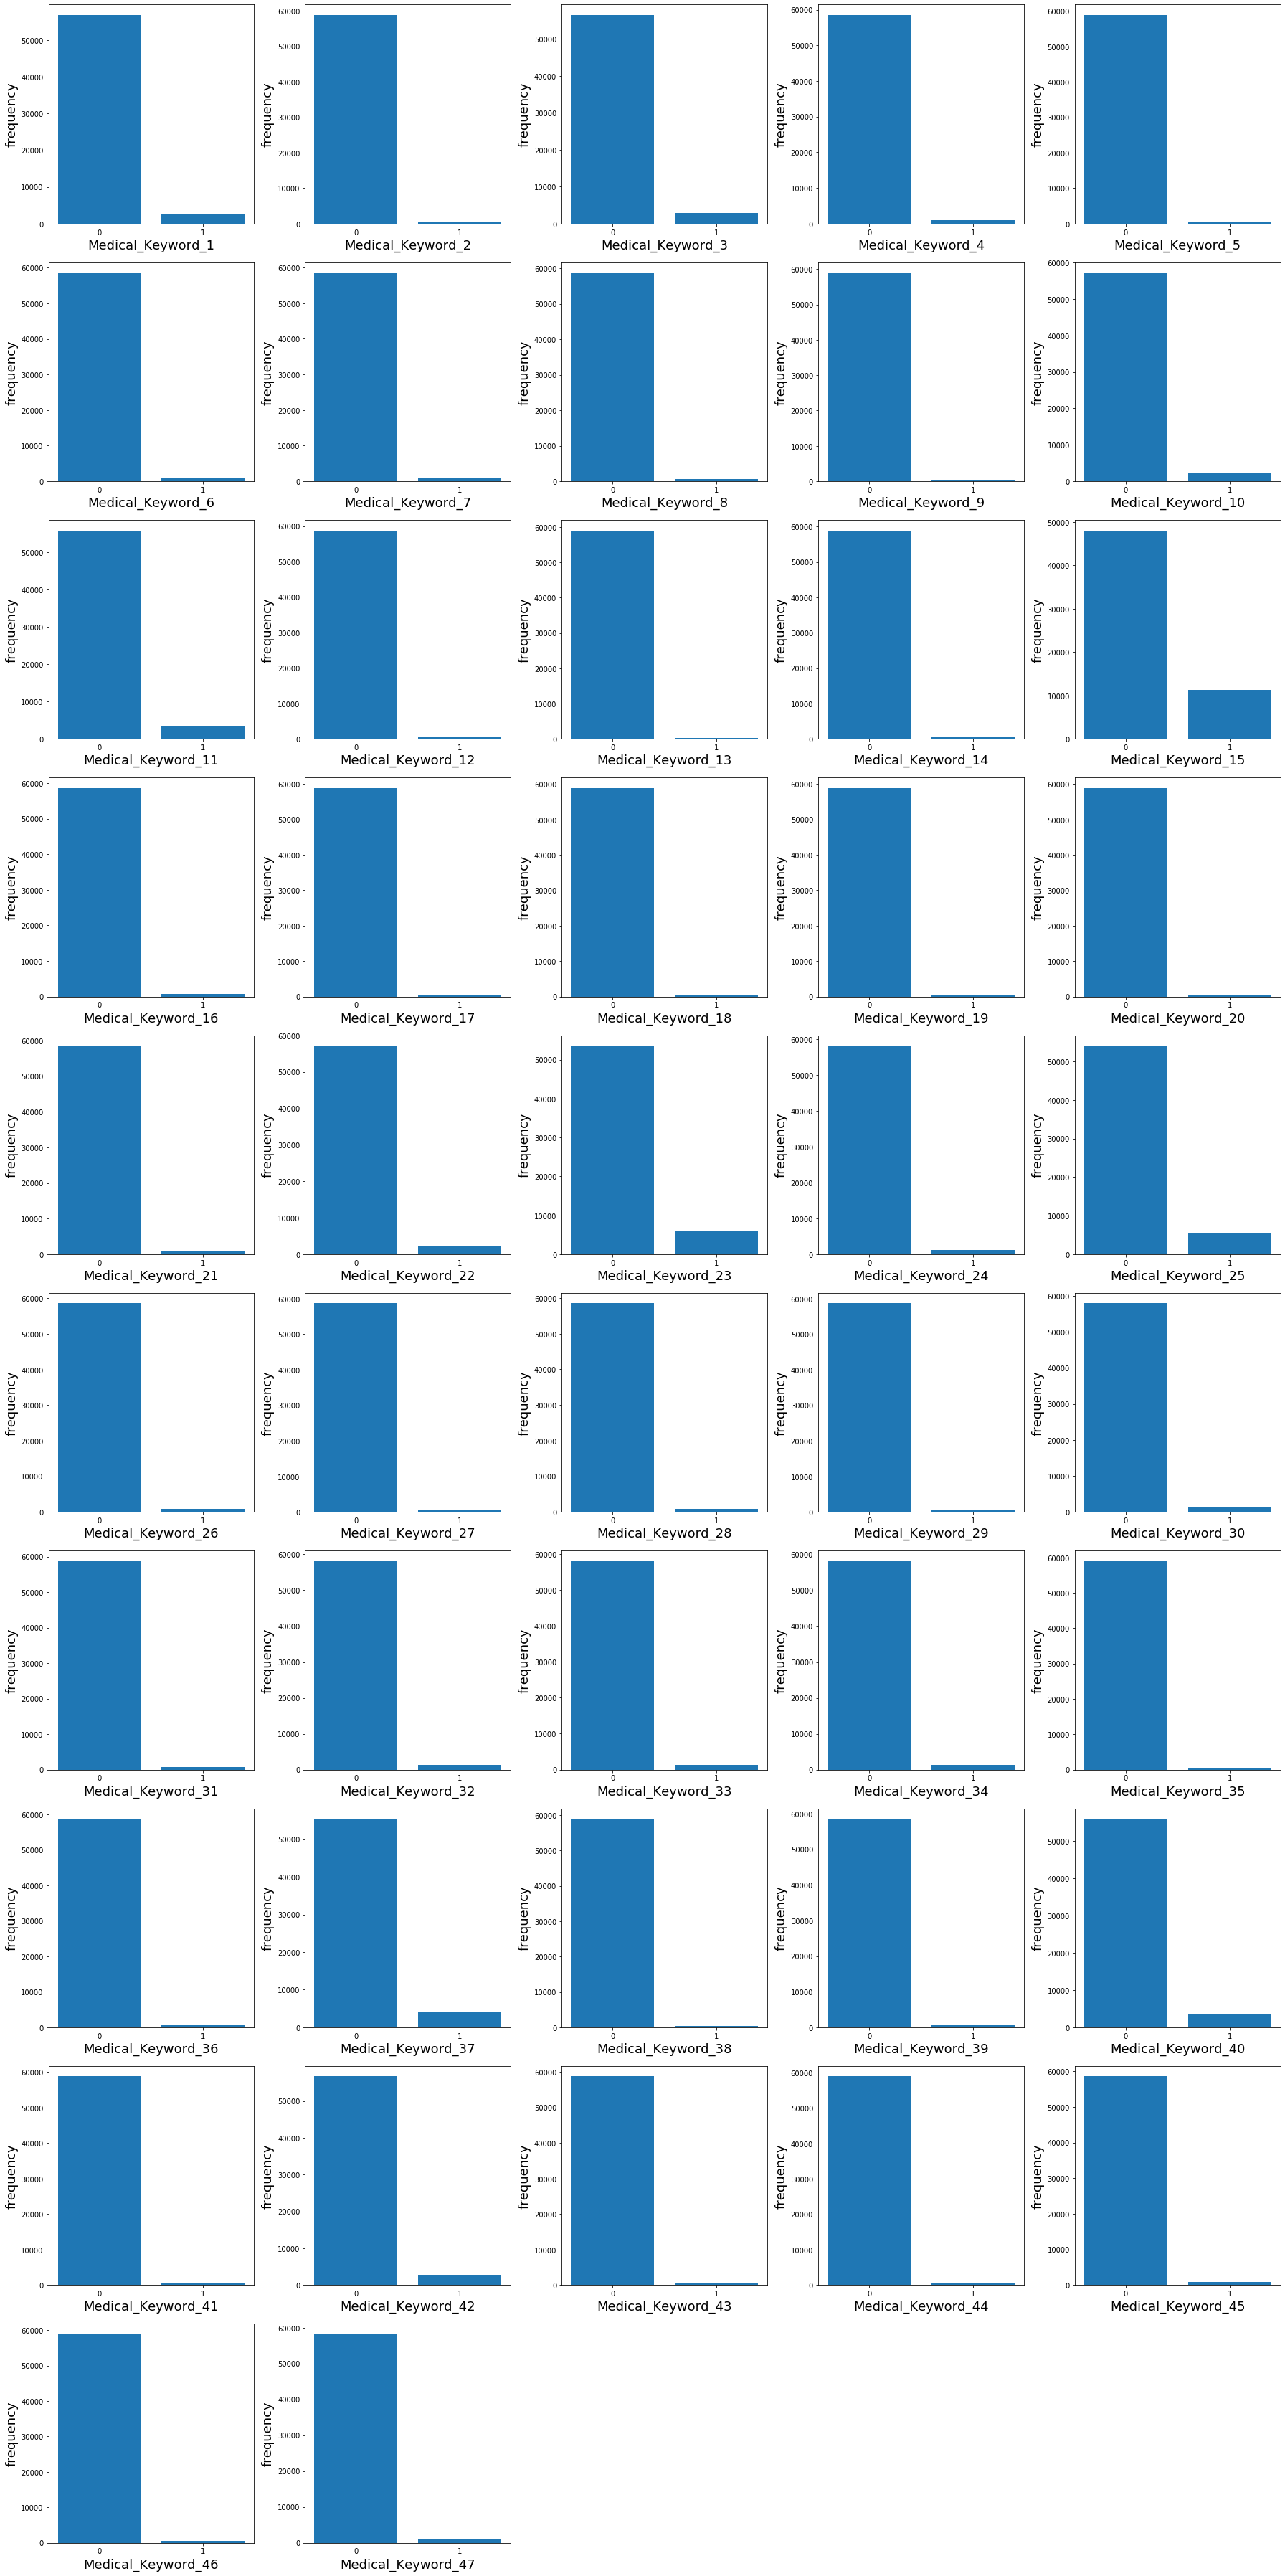

In [36]:
plot_categoricals(dummy_data)

Distribution of rows by response categories

Text(0.5, 1.0, 'Distribution of rows by response categories')

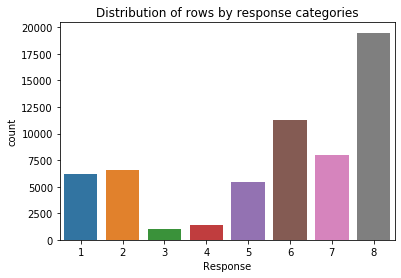

In [37]:
sns.countplot(x=Prudential_train.Response).set_title('Distribution of rows by response categories')

Observations from Target variable.
Majority of data is for Response=8 , followed by 6,7,2.
Lowest data is for Response=3,followed by 4.
Response = 1,2,5 show almost same distribution of data.
Target variable is "Response" and it has 8 classes - out of 8 data seems to be skewed towards class 8.

# OUTLIERS

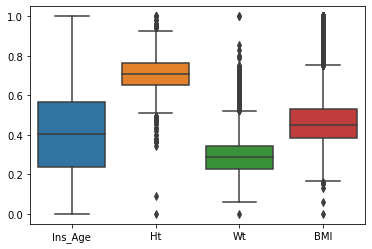

In [38]:
misc_cols=["Ins_Age","Ht","Wt","BMI"]
sns.boxplot(data=Prudential_train[misc_cols])

# Grouping the low risk associated with life insurance policy into one class. So we have 4 classes of risk. 

In [40]:
prudential_train=Prudential_train.drop(axis=1,labels=["Product_Info_2"])

In [43]:
prudential_train.dropna(axis=1,inplace=True)

In [44]:
def new_target(row):
    if (row['Response']<=5):
        val=0
    elif (row['Response']==6):
        val=1
    elif (row['Response']==7):
        val=2
    elif (row['Response']==8):
        val=3
    
    else:
        val=-1
    return val
prudential_train['Final_Response']=prudential_train.apply(new_target,axis=1)

Text(0.5, 1.0, 'Distribution of rows by response categories')

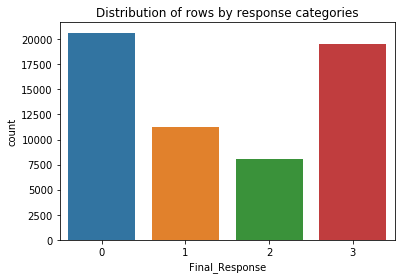

In [45]:
sns.countplot(x=prudential_train.Final_Response).set_title('Distribution of rows by response categories')

# Building Baseline Models

In [24]:
y = prudential_train.Final_Response
X = prudential_train.drop(labels=['Response'],axis=1)
X = X.drop(labels=['Final_Response'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)


print("Shape of X_train dataset {}".format(X_train.shape))
print("Shape of X_test dataset {}".format(X_test.shape))

print("Shape of y_train dataset {}".format(y_train.shape))
print("Shape of y_valid dataset {}".format(y_test.shape))

Shape of X_train dataset (47504, 113)
Shape of X_test dataset (11877, 113)
Shape of y_train dataset (47504,)
Shape of y_valid dataset (11877,)


In [25]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.626252420644944
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      4205
           1       0.45      0.30      0.36      2206
           2       0.50      0.29      0.37      1608
           3       0.67      0.86      0.75      3858

    accuracy                           0.63     11877
   macro avg       0.57      0.54      0.54     11877
weighted avg       0.60      0.63      0.60     11877



In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.36953776206112654
              precision    recall  f1-score   support

           0       0.37      0.77      0.50      4205
           1       0.00      0.00      0.00      2206
           2       0.00      0.00      0.00      1608
           3       0.38      0.29      0.33      3858

    accuracy                           0.37     11877
   macro avg       0.19      0.27      0.21     11877
weighted avg       0.25      0.37      0.28     11877



C:\Users\Divesh - Hemant Sir\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Divesh - Hemant Sir\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.581207375599899
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      4205
           1       0.39      0.22      0.28      2206
           2       0.43      0.19      0.27      1608
           3       0.61      0.85      0.71      3858

    accuracy                           0.58     11877
   macro avg       0.51      0.48      0.48     11877
weighted avg       0.55      0.58      0.55     11877



In [28]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.31043192725435714
              precision    recall  f1-score   support

           0       0.36      0.53      0.43      4205
           1       0.19      0.16      0.17      2206
           2       0.13      0.07      0.10      1608
           3       0.33      0.26      0.29      3858

    accuracy                           0.31     11877
   macro avg       0.25      0.25      0.25     11877
weighted avg       0.29      0.31      0.29     11877



In [29]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.513008335438242
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      4205
           1       0.32      0.33      0.33      2206
           2       0.29      0.31      0.30      1608
           3       0.64      0.63      0.63      3858

    accuracy                           0.51     11877
   macro avg       0.46      0.46      0.46     11877
weighted avg       0.52      0.51      0.52     11877



In [30]:
model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.428222615138503
              precision    recall  f1-score   support

           0       0.71      0.21      0.33      4205
           1       0.26      0.07      0.11      2206
           2       0.29      0.22      0.25      1608
           3       0.42      0.95      0.58      3858

    accuracy                           0.43     11877
   macro avg       0.42      0.36      0.32     11877
weighted avg       0.47      0.43      0.36     11877



In [31]:
# model = SVC()
# model.fit(X_train, y_train)
# model_predictions = model.predict(X_test)
# print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
# print("="*80)
# print(classification_report(y_test, model_predictions))

# MODEL 2

# Treating Outliers

In [46]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


dev=remove_outlier(Prudential_train,'BMI')
dev=remove_outlier(dev,'Wt')
dev=remove_outlier(dev,'Ht')

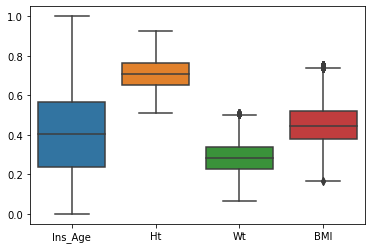

In [47]:
sns.boxplot(data=dev[misc_cols])

In [48]:
prudential_X_train = dev

In [49]:
def new_target(row):
    if (row['Response']<=5):
        val=0
    elif (row['Response']==6):
        val=1
    elif (row['Response']==7):
        val=2
    elif (row['Response']==8):
        val=3
    
    else:
        val=-1
    return val
prudential_X_train['Final_Response']=prudential_X_train.apply(new_target,axis=1)

In [50]:
medical_keyword_cols=[col for col in prudential_X_train.columns if str(col).startswith("Medical_Keyword")]

In [51]:
medical_cols=[col for col in prudential_X_train.columns if str(col).startswith("Medical_History")]

In [52]:
prudential_X_train['Total_MedKwrds']=prudential_X_train[medical_keyword_cols].sum(axis=1)
prudential_X_train['Total_MedHist']=prudential_X_train[medical_cols].sum(axis=1)

In [53]:
prudential_X_train['Total_MedKwrds']

0        0
1        0
2        0
3        1
4        0
        ..
59376    0
59377    0
59378    1
59379    2
59380    0
Name: Total_MedKwrds, Length: 57348, dtype: int64

Label encoding 

In [54]:
 from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
prudential_X_train['Product_Info_2_en'] = le.fit_transform(prudential_X_train['Product_Info_2'])

In [55]:
prudential_X_train['Product_Info_2_en']

0        16
1         0
2        18
3        17
4        15
         ..
59376    14
59377    16
59378    18
59379    15
59380     7
Name: Product_Info_2_en, Length: 57348, dtype: int32

In [56]:
prudential_X_train = prudential_X_train.drop(axis=1,labels=['Product_Info_2'])

In [57]:
prudential_X_train.Final_Response.unique()

array([3, 0, 1, 2], dtype=int64)

# Feature Selection

In [58]:
#Lets drop features having constant values and redundant features

In [59]:
prudential_X_train = prudential_X_train.drop(labels = ['Response'],axis=1)
prudential_X_train = prudential_X_train.drop(labels = ['Medical_History_10'],axis=1)
prudential_X_train = prudential_X_train.drop(labels = ['Id'],axis=1)

# Treating NULL values

In [61]:
prudential_X_train = prudential_X_train.fillna(prudential_X_train.mean())

# Building Models

In [62]:
y = prudential_X_train.Final_Response
X = prudential_X_train.drop(labels=['Final_Response'],axis=1)
X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)
print("Shape of X_train dataset {}".format(X_train.shape))
print("Shape of X_test dataset {}".format(X_test.shape))

print("Shape of y_train dataset {}".format(y_train.shape))
print("Shape of y_valid dataset {}".format(y_test.shape))

Shape of X_train dataset (45878, 127)
Shape of X_test dataset (11470, 127)
Shape of y_train dataset (45878,)
Shape of y_valid dataset (11470,)


In [63]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.6461203138622493
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      3731
           1       0.53      0.37      0.44      2202
           2       0.53      0.30      0.38      1642
           3       0.68      0.89      0.77      3895

    accuracy                           0.65     11470
   macro avg       0.60      0.57      0.57     11470
weighted avg       0.63      0.65      0.62     11470



In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.46625980819529206
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      3731
           1       0.32      0.10      0.15      2202
           2       0.25      0.00      0.00      1642
           3       0.45      0.83      0.58      3895

    accuracy                           0.47     11470
   macro avg       0.39      0.36      0.31     11470
weighted avg       0.42      0.47      0.40     11470



C:\Users\Divesh - Hemant Sir\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.42449869224062775
              precision    recall  f1-score   support

           0       0.47      0.51      0.49      3731
           1       0.29      0.24      0.26      2202
           2       0.20      0.13      0.16      1642
           3       0.49      0.57      0.53      3895

    accuracy                           0.42     11470
   macro avg       0.36      0.36      0.36     11470
weighted avg       0.40      0.42      0.41     11470



In [57]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.5453356582388841
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      3731
           1       0.40      0.43      0.41      2202
           2       0.33      0.33      0.33      1642
           3       0.68      0.66      0.67      3895

    accuracy                           0.55     11470
   macro avg       0.50      0.50      0.50     11470
weighted avg       0.55      0.55      0.55     11470



In [58]:
model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.44533565823888405
              precision    recall  f1-score   support

           0       0.58      0.32      0.41      3731
           1       0.27      0.10      0.14      2202
           2       0.24      0.36      0.29      1642
           3       0.50      0.80      0.62      3895

    accuracy                           0.45     11470
   macro avg       0.40      0.39      0.37     11470
weighted avg       0.45      0.45      0.41     11470

